Loading Data...
First few data points
   sqft  bedrooms   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
Normalizing Features...
sqft        2000.680851
bedrooms       3.170213
dtype: float64
sqft        794.702354
bedrooms      0.760982
dtype: float64
First few data points after normalization
       sqft  bedrooms
0  0.130010 -0.223675
1 -0.504190 -0.223675
2  0.502476 -0.223675
3 -0.735723 -1.537767
4  1.257476  1.090417


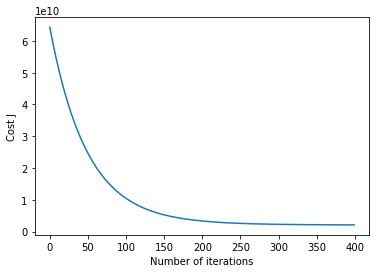

Theta computed from gradient descent: 

[334302.06399328 100087.11600585   3673.54845093]


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):

289314.6203377763




In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Loading Data...")
housingData = pd.read_csv(r"C:\Users\micha\Downloads\Housing_data.txt", names = ['sqft', 'bedrooms', 'price'])

#splits data appropriately and creates a size variable for the dataset
X = housingData[['sqft','bedrooms']]
Y = housingData['price']
m = np.size(Y, axis=0)

print("First few data points")
print(housingData.head())

#Normalization
print("Normalizing Features...")
mu = X.mean()
std = X.std()

print(mu)
print(std)

X = (X - mu) / std

print("First few data points after normalization")
print(X.head())

#Inserts the single column matrix of ones to the start of X
X.insert(0, "Intercepts", np.ones(m))

#Initializes variables & matrices for calculation
alpha = 0.01
num_iters = 400
theta = np.zeros((3,))

J_history = np.zeros((num_iters,))

xt = X.transpose()

#Gradient Descent algorithm done on each row
for i in range (num_iters):
    theta = theta - (alpha / m) * np.dot(xt, (np.dot(X, theta) - Y))
    
    #print(theta) Ignore this, was used for testing
    
    #J_History / Cost Function calculations
    predictions = X.dot(theta)
    sqErrors = (predictions - Y) ** 2
    J_history[i] = (1.0 /(2 * m)) * sqErrors.sum()
    
    #print(J_history[i]) Ignore this, was used for testing
    
#Graphing
plt.plot(J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

print("Theta computed from gradient descent: \n")
print(theta)
print('\n')

#Estimate the price of a 1650 sq-ft, 3 br house

price = 0
n_sf=(1650-mu[0])/std[0]
n_b=(3-mu[1])/std[1]

price=np.dot(theta,[1, n_sf, n_b])

print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n")
print(price)
print("\n")